In [14]:
# Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns # for data visualization
sns.reset_defaults()


In [15]:
# Loading the data
df = pd.read_csv('MCSDatasetNEXTCONLab.csv')
df.head()

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber,Ligitimacy
0,1,45.442142,-75.303369,1,4,13,40,40,9,91,0,131380,1
1,1,45.442154,-75.304366,1,4,23,40,30,9,91,0,131380,1
2,1,45.442104,-75.303963,1,4,33,40,20,9,91,0,121996,1
3,1,45.441868,-75.303577,1,4,43,40,10,9,91,0,121996,1
4,2,45.447727,-75.147722,2,15,49,30,30,5,47,0,140784,1


In [16]:
# Splitting
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape)
print(X_test.shape)

(11587, 12)
(2897, 12)


In [17]:
# Random Forest model training
rf = RandomForestClassifier().fit(X_train, y_train)

# Adaboost model training
adaboost = AdaBoostClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)

# Gaussian Naive Bayes
gnb = GaussianNB().fit(X_train, y_train)

In [18]:
# Function to show classification report and plot the confusion matrix
def report_and_confusion(y_test, y_pred):
    labels1 = ['Fake', 'Legitimate']
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels1)
    disp.plot()

    plt.show()

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       379
           1       0.99      1.00      1.00      2518

    accuracy                           1.00      2897
   macro avg       1.00      0.98      0.99      2897
weighted avg       1.00      1.00      1.00      2897



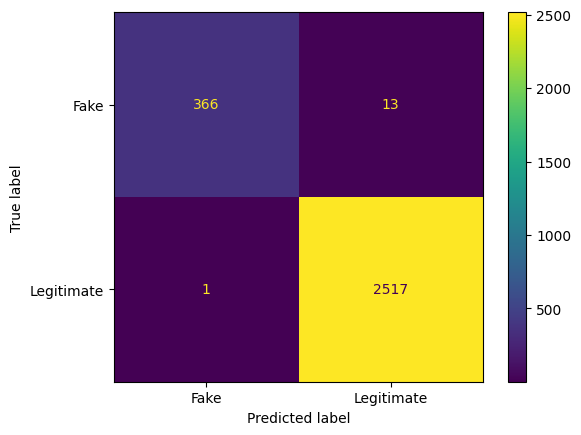

              precision    recall  f1-score   support

           0       0.88      0.81      0.84       379
           1       0.97      0.98      0.98      2518

    accuracy                           0.96      2897
   macro avg       0.93      0.90      0.91      2897
weighted avg       0.96      0.96      0.96      2897



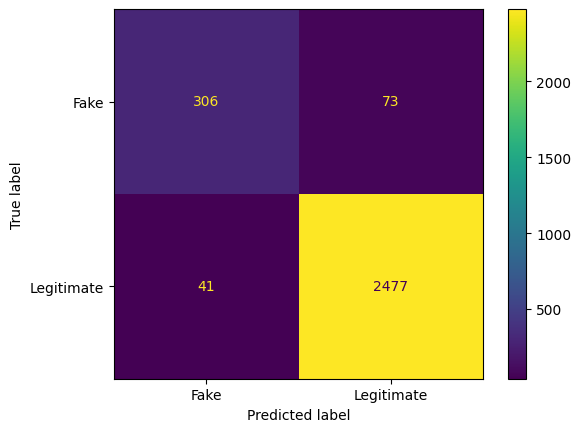

              precision    recall  f1-score   support

           0       0.67      0.01      0.01       379
           1       0.87      1.00      0.93      2518

    accuracy                           0.87      2897
   macro avg       0.77      0.50      0.47      2897
weighted avg       0.84      0.87      0.81      2897



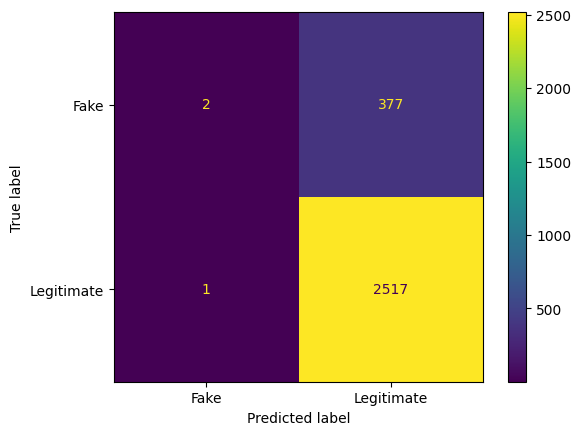

In [19]:
# Random Forest model testing
y_pred1 = rf.predict(X_test)
report_and_confusion(y_test, y_pred1)

# Adaboost model testing
y_pred2 = adaboost.predict(X_test)
report_and_confusion(y_test, y_pred2)

# Gaussian Naive testing
y_pred3 = gnb.predict(X_test)
report_and_confusion(y_test,y_pred3)

              precision    recall  f1-score   support

           0       1.00      0.80      0.89       379
           1       0.97      1.00      0.99      2518

    accuracy                           0.97      2897
   macro avg       0.98      0.90      0.94      2897
weighted avg       0.97      0.97      0.97      2897



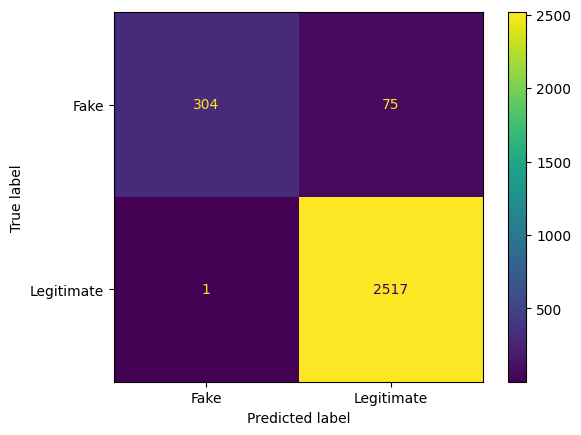

In [20]:
# Agrregator based on majority voting rule
y_pred4 = (y_pred1 + y_pred2 + y_pred3) >= 2
report_and_confusion(y_test, y_pred4)

Train Accuracies:  1.0 0.974885647708639 0.8691637179597825
Weights:  0.3516113370152334 0.34278084602779635 0.30560781695697037
              precision    recall  f1-score   support

           0       1.00      0.80      0.89       379
           1       0.97      1.00      0.99      2518

    accuracy                           0.97      2897
   macro avg       0.98      0.90      0.94      2897
weighted avg       0.97      0.97      0.97      2897



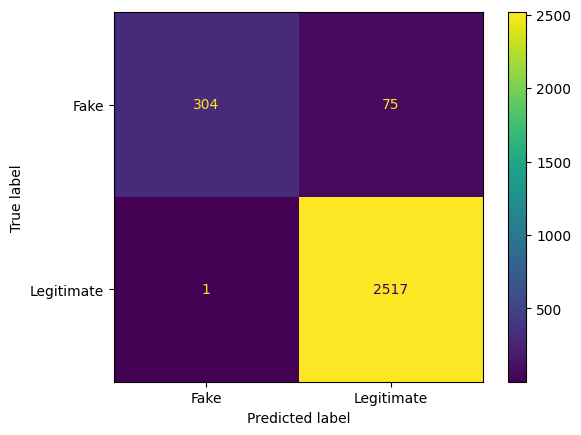

In [21]:
# Agrregator based on weighted sum of classifiers decisions
pred1 = rf.predict(X_train)
acc1 = accuracy_score(y_train, pred1)
pred2 = adaboost.predict(X_train)
acc2 = accuracy_score(y_train, pred2)
pred3 = gnb.predict(X_train)
acc3 = accuracy_score(y_train, pred3)
wrf = acc1/(acc1 + acc2 + acc3)
wada = acc2/(acc1 + acc2 + acc3)
wgnb = acc3/(acc1 + acc2 + acc3)
y_pred5 = (y_pred1 * wrf + y_pred2 * wada + y_pred3 * wgnb) > 0.5 
print("Train Accuracies: ", acc1, acc2, acc3)
print("Weights: ", wrf, wada, wgnb)
report_and_confusion(y_test, y_pred5)

[0.9951674145667933, 0.9606489471867449, 0.8695201933034173, 0.9737659647911633, 0.9737659647911633]


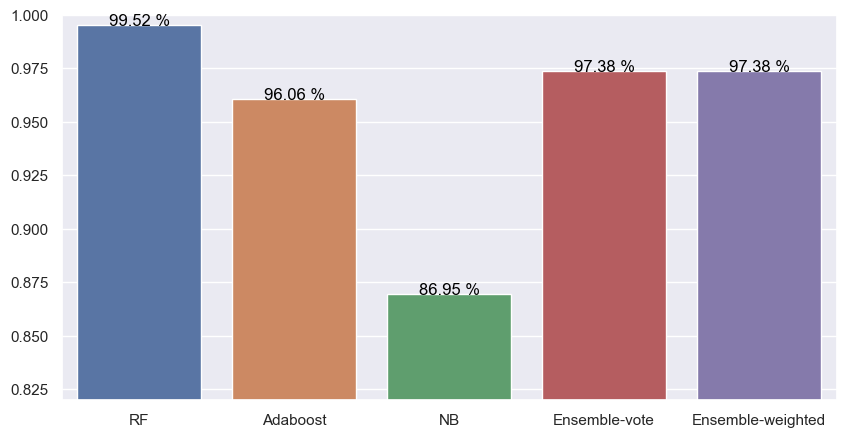

In [23]:
# Calculating accuracies and plotting the bar plot
test_acc1 = accuracy_score(y_test, y_pred1)
test_acc2 = accuracy_score(y_test, y_pred2)
test_acc3 = accuracy_score(y_test, y_pred3)
test_acc4 = accuracy_score(y_test, y_pred4)
test_acc5 = accuracy_score(y_test, y_pred5)
test_acc_ls=[test_acc1,test_acc2,test_acc3,test_acc4,test_acc5]
print(test_acc_ls)
sns.set()
plt.figure(figsize=(10,5))
g=sns.barplot(x = ['RF', 'Adaboost', 'NB', 'Ensemble-vote', 'Ensemble-weighted'], y = test_acc_ls)
g.set(ylim=(0.82, 1));
counter=0
for va in test_acc_ls:
  v=str(round(va,4)*100)+' %'
  g.text(counter,va,v, color='black', ha="center")
  counter+=1
plt.show()